In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from surface_dynamics.databases.flat_surfaces import CylinderDiagrams
from surface_dynamics import AbelianStratum


In [3]:
G = nx.DiGraph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_edge(1, 2)

In [14]:
C = CylinderDiagrams()
a = AbelianStratum(2, 1, 1).unique_component()
l = list(C.get_iterator(a, 4))
l

[(0)-(1) (1,3,4,2)-(5,6) (5)-(0,4) (6)-(2,3),
 (0)-(1,2) (1,4,2,3)-(5,6) (5)-(4) (6)-(0,3),
 (0)-(3) (1,3,2,4)-(5,6) (5)-(4) (6)-(0,2,1),
 (0)-(3) (1,4,2,3)-(5,6) (5)-(4) (6)-(0,2,1),
 (0,1)-(0,2,5) (2)-(3) (3,6)-(1,4) (4,5)-(6),
 (0,2)-(5) (1,3)-(6) (4)-(0,1) (5,6)-(2,4,3),
 (0,1)-(0,3) (2,5)-(1,6) (3,6)-(4,5) (4)-(2),
 (0,2)-(0,5) (1,3)-(1,6) (4,5)-(3) (6)-(2,4),
 (0,2)-(6) (1,4)-(3,5) (3,6)-(2,4) (5)-(0,1),
 (0,1)-(0,2) (2,4)-(6) (3,6)-(1,5,4) (5)-(3),
 (0,1)-(0,3,5,6) (2,4)-(1) (3,6)-(4) (5)-(2),
 (0,1,2)-(0,1,6) (3)-(5) (4,5)-(2) (6)-(3,4),
 (0,4,1)-(6) (2)-(3) (3,6)-(4,5) (5)-(0,2,1),
 (0,3,1)-(6) (2)-(4) (4,6)-(0,5,1) (5)-(2,3),
 (0,3,1)-(6) (2)-(3) (4,6)-(0,5,1) (5)-(2,4),
 (0,1,2)-(3,6,4,5) (3,4)-(2) (5)-(0) (6)-(1),
 (0,1,2)-(0,1,6) (3,6)-(4,5) (4)-(3) (5)-(2),
 (0,2,1)-(5,6) (3,4)-(0,2,1) (5)-(4) (6)-(3),
 (0,2,1)-(5,6) (3,6)-(0,4,1) (4)-(2) (5)-(3),
 (0,2,1)-(5,6) (3,6)-(0,4,1) (4)-(3) (5)-(2),
 (0,4,2)-(5,6) (1,3)-(0,1,2) (5)-(4) (6)-(3),
 (0,2,1)-(6) (3,6)-(4,5) (4)-(3) (

In [23]:
cd = l[1]
print(cd.degree())
cd.cylinders()

7


[((0,), (1, 2)), ((1, 4, 2, 3), (5, 6)), ((5,), (4,)), ((6,), (0, 3))]

In [65]:
def check_sets(element, list_sets):
    for s in list_sets:
        if element in s:
            return true
    return false

def compute_singularities(perm):
    """Computes a list of singularities. 
    
    Each saddle is identified with its right vertex. A singularity is then an equivalence class (set) of saddles."""
    singularities = []
    for i in perm:
        if check_sets(i, singularities):
            continue
        
        next_set = {i}
        while perm[i] not in next_set:
            i = perm[i]
            next_set.add(i)
        singularities.append(next_set)
    return singularities

def find_element_in_partition(partition, element):
    """Gives the singularity corresponding to the right vertex of the saddle."""
    for i, part in enumerate(partition):
        if element in part:
            return i

def collapse_same_genus(cylinder_diagram, cylinder_class):
    """Tells whether a certain collapse will be in the same genus.
    
    Return true if the collapse is forced to be the same genus.
    Return false if the collapse may be a lower genus.
    
    cylinder_list is a list of ints corresponding to the cylinder equivalence class being collapsed
    cylinder_diagram is a surface_dynamics.flat_surfaces.separatrix_diagram.CylinderDiagram object that represents a translation surface
    """
    sing_list = compute_singularities(cylinder_diagram.outgoing_edges_perm())
    digraph = nx.DiGraph()
    digraph.add_nodes_from(range(len(sing_list)))
    
    cylinders = cylinder_diagram.cylinders()
    for c_index in cylinder_class:
        for bot_saddle in cylinders[c_index][0]:
            for top_saddle in cylinders[c_index][1]:
                start = find_singularity_of_saddle(sing_list, bot_saddle)
                end = find_element_in_partition(sing_list, top_saddle)
                digraph.add_edge(start, end)
    nx.draw(digraph, with_labels=True, font_weight='bold')
    if nx.is_directed_acyclic_graph(digraph):
        return True
    return False

[{0, 1, 3}, {2, 4}, {5, 6}]


False

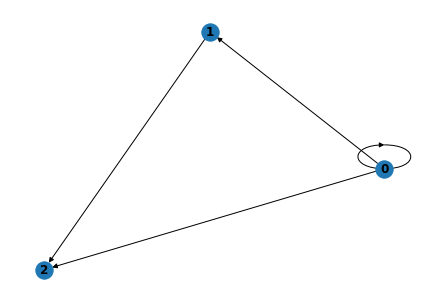

In [66]:
print(compute_singularities(cd.outgoing_edges_perm()))
collapse_same_genus(cd, [0, 1])

In [71]:
class CylinderClasses:
    def __init__(self, cyl_diag, classes):
        self.cyl_diag = cyl_diag
        self.classes = classes

def valid_cylinder_equivalence_classes(cyl_diag, num_classes, free_cylinders = True):
    """Cylinders are numbered. An edge is draw if the cylinders are connected."""
    cylinders = cyl_diag.cylinders()
    
    digraph_data = [[None, None] for _ in range(cd.degree())]
    for i, (bot, top) in enumerate(cyl_diag.cylinders()):
        for separatrix in bot:
            digraph_data[separatrix][0] = i
        for separatrix in top:
            digraph_data[separatrix][1] = i
    print(digraph_data)
    
    G = nx.DiGraph()
    G.add_nodes_from(range(len(cylinders)))
    for source, dest in digraph_data:
        G.add_edge(source, dest)
    
    nx.draw(G, with_labels=True, font_weight='bold')

def two_implies_three(partition, condition):
    """Check the partition satisfies a property.
    
    condition contains three integers. 
    If a set in partition contains two of these integers then it must contain the third.
    Return whether this property is satisfied.
    """
    first = find_element_in_partition(partition, condition[0])
    second = find_element_in_partition(partition, condition[1])
    third = find_element_in_partition(partition, condition[2])
    if (first == second == third):
        return True
    elif (first == second) or (first == third) or (second == third):
        return False
    else:
        return True

def partitions(n, m, singletons=True):
    """List all ways to partition the set [1..n] into m sets.
    
    If singletons==False, do not allow singleton sets."""
    def contains_singleton(l):
        return any([i == 1 for i in l])

    partitions = []
    underlying_part = Partitions(n, length=m).list()
    if not singletons:
        underlying_part = [i for i in underlying_part if not contains_singleton(i)]
    for up in underlying_part:
        partitions.extend(SetPartitions(n, up))
    return partitions

assert(len(partitions(5, 2, singletons=False)) == 10)
assert(len(partitions(5, 2, singletons=True)) == 15)
assert(len(partitions(6, 2, singletons=False)) == 25)
assert(len(partitions(6, 3, singletons=False)) == 15)

[[0, 3], [1, 0], [1, 0], [1, 3], [1, 2], [2, 1], [3, 1]]


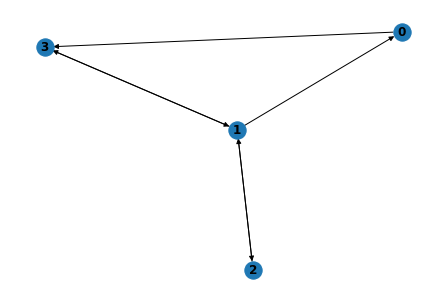

In [68]:
valid_cylinder_equivalence_classes(cd, 2)